# About this Project
In this project, you will calculate the logistic loss.
In the next projects, you will calculate the gradient of the logistic loss function and implement gradient descent.
You will ultimately use all these functions in the final project to create a logistic regression classifier that can "filter" spam email messages.

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Build a Spam Email Classifier - Project 1 (Logistic Loss)
Rather than working directly on the email data, we will first build some intuition about logistic regression using random data. Let's approach the spam email classification problem from the end-goal.

What will be our inputs and outputs? Our input ultimately will be email text data or metadata, and the classifier should process one email (an input data point) to output 'spam' or 'not spam'. How can we represent the inputs and outputs in a machine-readable form? We can convert text data into a  𝑑
 -dimensional numeric vector (such as by using the hashing technique, which you might remember from a previous course). For outputs, we can represent the 'spam' or 'not spam' with binary (-1/1) labels.

Since our problem is a binary classification problem on numeric features, we can now abstract away the actual dataset and use an artificial dataset created randomly. For visualization purposes, we will limit ourselves to 2-dimensional feature vector when working with an artificial dataset.

One way to generate 2D random data for 2 classes is by using non-overlapping multivariate normal distributions. This should be very easily separable for logistic regression.

In [ ]:
np.random.seed(12)
n_samples = 500

covariance = [[1, .25],
              [.25, 1]]
class_one = np.random.multivariate_normal(mean=[5, 10], cov=covariance, size=n_samples)
class_one_labels = -np.ones(n_samples)

class_two = np.random.multivariate_normal(mean=[0, 5], cov=covariance, size=n_samples)
class_two_labels = np.ones(n_samples)

features = np.vstack((class_one, class_two))
labels = np.hstack((class_one_labels, class_two_labels))

Let's see what what our feature vectors look like. We can get statistics (count, mean, std, min, max, 25th percentile value, 50th percentile value, and 75th percentile value) of feature_1 and feature_2 separately for data points of each class. For label == -1, feature_1 should lie around value 5 and feature_2 should lie around value 10 (and standard deviation should be about 1). Similarly for label == 1.

In [ ]:
print('features shape: ', features.shape)
print(features.round(3))

df = pd.DataFrame(np.vstack([labels, features[:, 0], features[:, 1]]).T, columns=['label', 'feature_1', 'feature_2'])
display(df.groupby('label').describe())

features shape:  (1000, 2)
[[ 5.043  9.209]
 [ 5.85   8.767]
 [ 5.344  8.465]
 ...
 [ 0.095  3.989]
 [ 1.811  3.701]
 [-0.096  4.075]]


feature_1                                                              \
          count      mean       std       min       25%       50%       75%   
label                                                                         
-1.0      500.0  5.014419  0.993995  1.649121  4.346935  4.952776  5.699140   
 1.0      500.0  0.084412  0.953539 -2.738306 -0.441260  0.095190  0.721055   

                feature_2                                                    \
            max     count      mean       std       min       25%       50%   
label                                                                         
-1.0   7.974849     500.0  9.987246  1.065488  6.341087  9.221692  9.961198   
 1.0   2.630407     500.0  5.027197  0.984592  2.173495  4.413505  5.010992   

                             
             75%        max  
label                        
-1.0   10.730254  12.940244  
 1.0    5.683103   7.959722

We can visualize the features for each class in a 2D scatter plot.

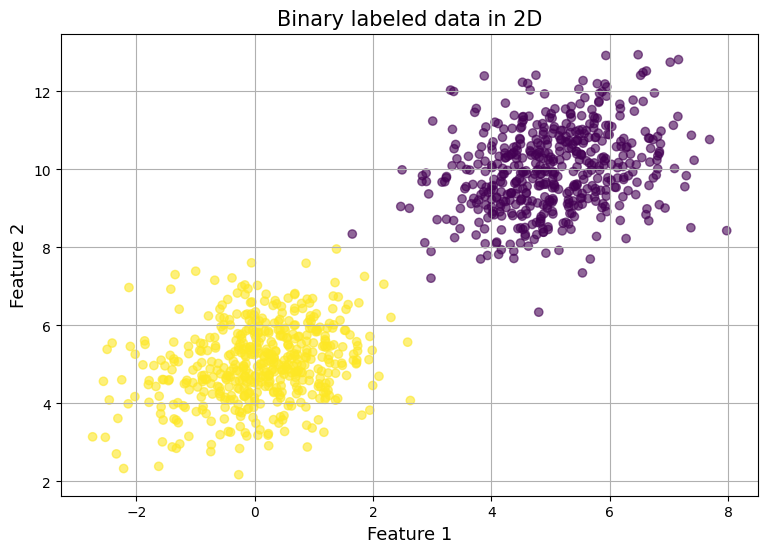

In [ ]:
plt.figure(figsize=(9, 6))
plt.scatter(features[:, 0], features[:, 1],
            c=labels, alpha=.6);

plt.title("Binary labeled data in 2D", size=15);
plt.xlabel("Feature 1", size=13);
plt.ylabel("Feature 2", size=13);
plt.grid();

In logistic regression, we use gradient ascent to solve for the weight vector that maximizes the (log) likelihood of observing the data. As you have learned so far, this optimal weight vector defines a perpendicular hyperplane that best divides the data points of the two classes.

Equivalently, we can use gradient descent to solve for the weight vector that minimizes the negative log likelihood - refer to Module 3 if you need a review of this derivation!

So, let's continue walking backwards from our goal. Now that we have an artificial dataset, we need to create a logistic regression classifier. For the classifier, we will need to compute the negative log likelihood (modeled using the logistic loss function) and a function to train the minimize the negative log likelihood using gradient descent.

The logistic loss uses the sigmoid function, which you will implement first. Next, you will implement  𝑃(𝑦𝑖|𝐱𝑖)
  using the sigmoid function, followed by the negative log likelihood. You will use these functions in the subsequent projects.

# **Part One: Sigmoid [Graded]**
In sigmoid, implement the sigmoid function:  𝜎(𝑧)=1/(1+𝑒^(−𝑧))
 .

In [ ]:
def sigmoid(z):
    '''
    Calculates the sigmoid of z.

    Input:
        z: scalar or array of dimension n

    Output:
        scalar or array of dimension n
    '''
    n = z.size

    sig = 1+ np.exp(-z)
    sigmoid = np.divide(1, sig)

    return sigmoid

    raise NotImplementedError()

Let's plot the sigmoid function for values around 0. The sigmoid function should plateau, i.e. output almost a constant value, for negative or positive values of large magnitude.

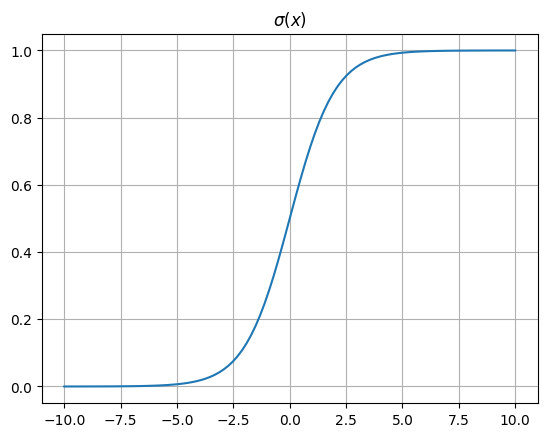

In [ ]:
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.plot(x, y)
plt.title('$\sigma(x)$')
plt.grid()

# Part Two: Implement y_pred [Graded]
Implement the function y_pred(X, w) that computes  𝑃(𝑦𝑖=1|𝐱𝑖;𝐰,𝑏)
  for each row-vector  𝐱𝑖
  in the matrix X.

Recall that:
𝑃(𝑦𝑖|𝐱𝑖;𝐰,𝑏)=𝜎(𝑦𝑖(𝐰⊤𝐱𝑖+𝑏))

Since y_pred calculates the probability of the positive label +1,  𝜎(𝑦𝑖(𝐰⊤𝐱𝑖+𝑏))
  simplifies to  𝜎(𝐰⊤𝐱𝑖+𝑏)
 , which you must output.

In [ ]:
def y_pred(X, w, b=0): #incorrect
    '''
    Calculates the probability of the positive class.

    Input:
        X: data matrix of shape nxd
        w: d-dimensional vector
        b: scalar (optional, default is 0)

    Output:
        n-dimensional vector
    '''

    # Validate inputs
    assert isinstance(X, np.ndarray) and isinstance(w, np.ndarray)
    assert len(X.shape) == 2 and len(w.shape) == 1
    assert X.shape[1] == w.shape[0]
    assert isinstance(b, (int, float))

    if b != 0:
      X = np.hstack((X, np.ones((X.shape[0], 1)))) #add a dimension to every row of X - am I getting confused with linear regression?
      w.flat = np.concatenate((w.flat, [b]), axis=0) #absorb the bias in weight - am I getting confused with linear regression?

    logit = w.flat @ X.T # w.flat is 1xd, X.T is dxn, innner product is 1xn vector
    pos_label = 1

    y_pred = sigmoid(pos_label*logit)

    return y_pred

    raise NotImplementedError()

In [ ]:
def y_pred(X, w, b=0): #correct
    '''
    Calculates the probability of the positive class.

    Input:
        X: data matrix of shape nxd
        w: d-dimensional vector
        b: scalar (optional, default is 0)

    Output:
        n-dimensional vector
    '''

    # Validate inputs
    assert isinstance(X, np.ndarray) and isinstance(w, np.ndarray)
    assert len(X.shape) == 2 and len(w.shape) == 1
    assert X.shape[1] == w.shape[0]

    logit = np.add(X @ w, b) #do not absorb the b, just add it to the logit inner product element wise
    y_pred = sigmoid(logit)

    return y_pred

In [ ]:
w = np.array([5, 1, 3, 2])

In [ ]:
w = np.hstack((w, np.ones(2)))
print(w)

[5. 1. 3. 2. 1. 1. 1.]


In [ ]:
w = np.concatenate((w,[4]), axis = 0)
print(w)

[5. 1. 3. 2. 1. 1. 1. 4. 4.]


In [ ]:
X = np.random.rand(5,4)
print(X)

[[0.04389721 0.81709816 0.32719549 0.94390204]
 [0.45527649 0.41780635 0.21976962 0.70224389]
 [0.04655472 0.97742049 0.59245644 0.7067453 ]
 [0.9462317  0.59386753 0.66698837 0.2857789 ]
 [0.16068874 0.32513929 0.33420565 0.89090475]]


In [ ]:
w.flat @ X.T

array([3.90597477, 4.75798542, 4.40105401, 7.89754896, 3.91300943])

In [ ]:
X @ w

array([3.90597477, 4.75798542, 4.40105401, 7.89754896, 3.91300943])

In [ ]:
b = 1
X @ w + b

array([4.90597477, 5.75798542, 5.40105401, 8.89754896, 4.91300943])

In [ ]:
np.add(X @ w, b)

array([ 2, -6,  2, -2, -2])

In [ ]:
y = np.array([1, -1, -1, 1, 1])
np.multiply(y, (np.add(X @ w, b)))

array([ 2,  6, -2, -2, -2])

In [ ]:
sigmoid(X @ w + b)

array([0.99265217, 0.99685247, 0.99550844, 0.9998633 , 0.9927033 ])

In [ ]:
n, d = 5, 3
X = np.random.randint(0, 3, (n,d))    # contains multiple observations as rows
w = np.random.randint(-3, 3, d)       # this will be our trained vector of coefficients
b = 1                                 # this will be our trained offset (or bias) scalar

print(f'X = \n{X}')
print(f'w = {w}, b = {b}')

X = 
[[0 1 2]
 [2 1 0]
 [0 0 1]
 [1 0 0]
 [1 1 1]]
w = [-3 -1  1], b = 1


In [ ]:
pY = y_pred(X, w, b).round(2)
print(f'Vector of probabilities of class +1 (conditional on x and w) = {pY}')
print(f'Vector of probabilities of class -1 (conditional on x and w) = {1-pY}')

Vector of probabilities of class +1 (conditional on x and w) = [0.88 0.   0.88 0.12 0.12]
Vector of probabilities of class -1 (conditional on x and w) = [0.12 1.   0.12 0.88 0.88]


# Part Three: Implement log_loss [Graded]
Now you will compute the negative log likelihood in log_loss. You are given the label vector y and the data matrix X with n data points as row vectors. The negative log likelihood ( 𝑁𝐿𝐿
 ) is defined as follows:

𝑁𝐿𝐿=−log𝑃(𝐲|𝐗;𝐰,𝑏)=−log∏𝑖=1𝑛𝑃(𝑦𝑖|𝐱𝑖;𝐰,𝑏)=−∑𝑖=1𝑛log𝑃(𝑦𝑖|𝐱𝑖;𝐰,𝑏)=−∑𝑖=1𝑛log𝜎(𝑦𝑖(𝐰⊤𝐱𝑖+𝑏)).

While we only computed the probability of a positive label in y_pred, now we will account for the actual  𝑦
  value. You can use your implementation of y_pred for log_loss or reimplement to account for the  𝑦
  -- the latter yields cleaner code.

In [ ]:
def log_loss(X, y, w, b=0):
    '''
    Calculates the negative log likelihood for dataset (X, y) using the weight vector w and bias b.

    Input:
        X: data matrix of shape nxd
        y: n-dimensional vector of labels (+1 or -1)
        w: d-dimensional vector
        b: scalar (optional, default is 0)

    Output:
        scalar
    '''
    assert np.sum(np.abs(y)) == len(y) # check if all labels in y are either +1 or -1

    logit = y * (X @ w +b)
    log_likelihood = np.log(1+np.exp(-logit))

    return np.sum(log_likelihood, axis = 0)

    raise NotImplementedError()

In [ ]:
y = np.array([1, 1, 1, 1, 1])

In [ ]:
logit = y * (X @ w + b)

In [ ]:
log_likelihood = np.log(1+np.exp(-logit))
print(log_likelihood)

[0.12692801 6.00247569 0.12692801 2.12692801 2.12692801]


In [ ]:
np.sum(log_likelihood, axis = 0)

10.510187729309619

In [ ]:
-np.sum(np.log(y_pred(X,w, b)))

10.510187729309619

Error due to y_pred function due to assert b being float rather np.array like in the tests.

The error messages indicate that the assert isinstance(b, (int, float)) statement in the y_pred function is causing an exception. This is because b is being passed as a numpy array instead of an integer or a float.

To fix the code, we can modify the assert statement to check if b is a scalar numpy array of size 1, and if so, extract the scalar value from it using the item method. Here's the updated code:

In [ ]:
assert isinstance(b, np.ndarray) and b.size == 1 or isinstance(b, (int, float))
  if isinstance(b, np.ndarray):
    b = b.item()

# Build a Spam Email Classifier - Project 2 (Gradient Descent)
In the last project, you implemented the sigmoid, y_pred for  𝑃(𝑦𝑖=1|𝐱𝑖;𝐰,𝑏)
 , and log_loss for negative log likelihood functions. In this project, you will use them to finish your logistic regression classifier. For the classifier, you will implement the gradient and a "training" function that does gradient descent.

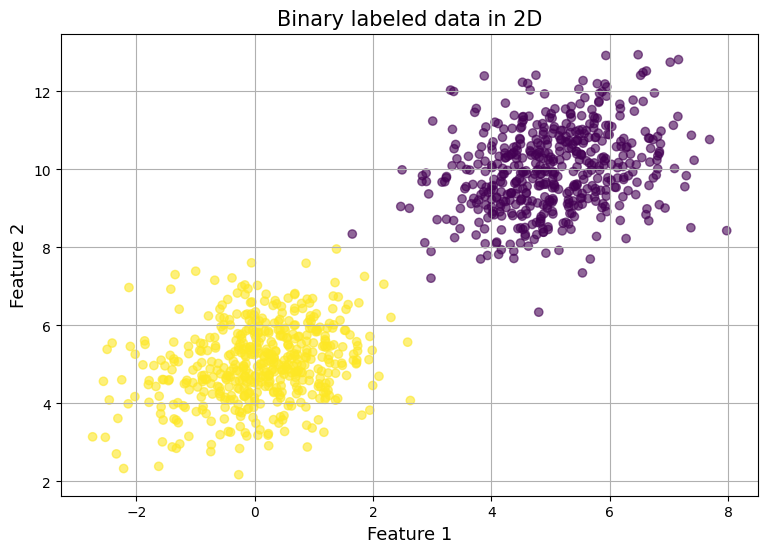

In [ ]:
np.random.seed(12)
n_samples = 500

covariance = [[1, .25],
              [.25, 1]]
class_one = np.random.multivariate_normal(mean=[5, 10], cov=covariance, size=n_samples)
class_one_labels = -np.ones(n_samples)

class_two = np.random.multivariate_normal(mean=[0, 5], cov=covariance, size=n_samples)
class_two_labels = np.ones(n_samples)

features = np.vstack((class_one, class_two))
labels = np.hstack((class_one_labels, class_two_labels))

plt.figure(figsize=(9, 6))
plt.scatter(features[:, 0], features[:, 1],
            c=labels, alpha=.6);

plt.title("Binary labeled data in 2D", size=15);
plt.xlabel("Feature 1", size=13);
plt.ylabel("Feature 2", size=13);
plt.grid();

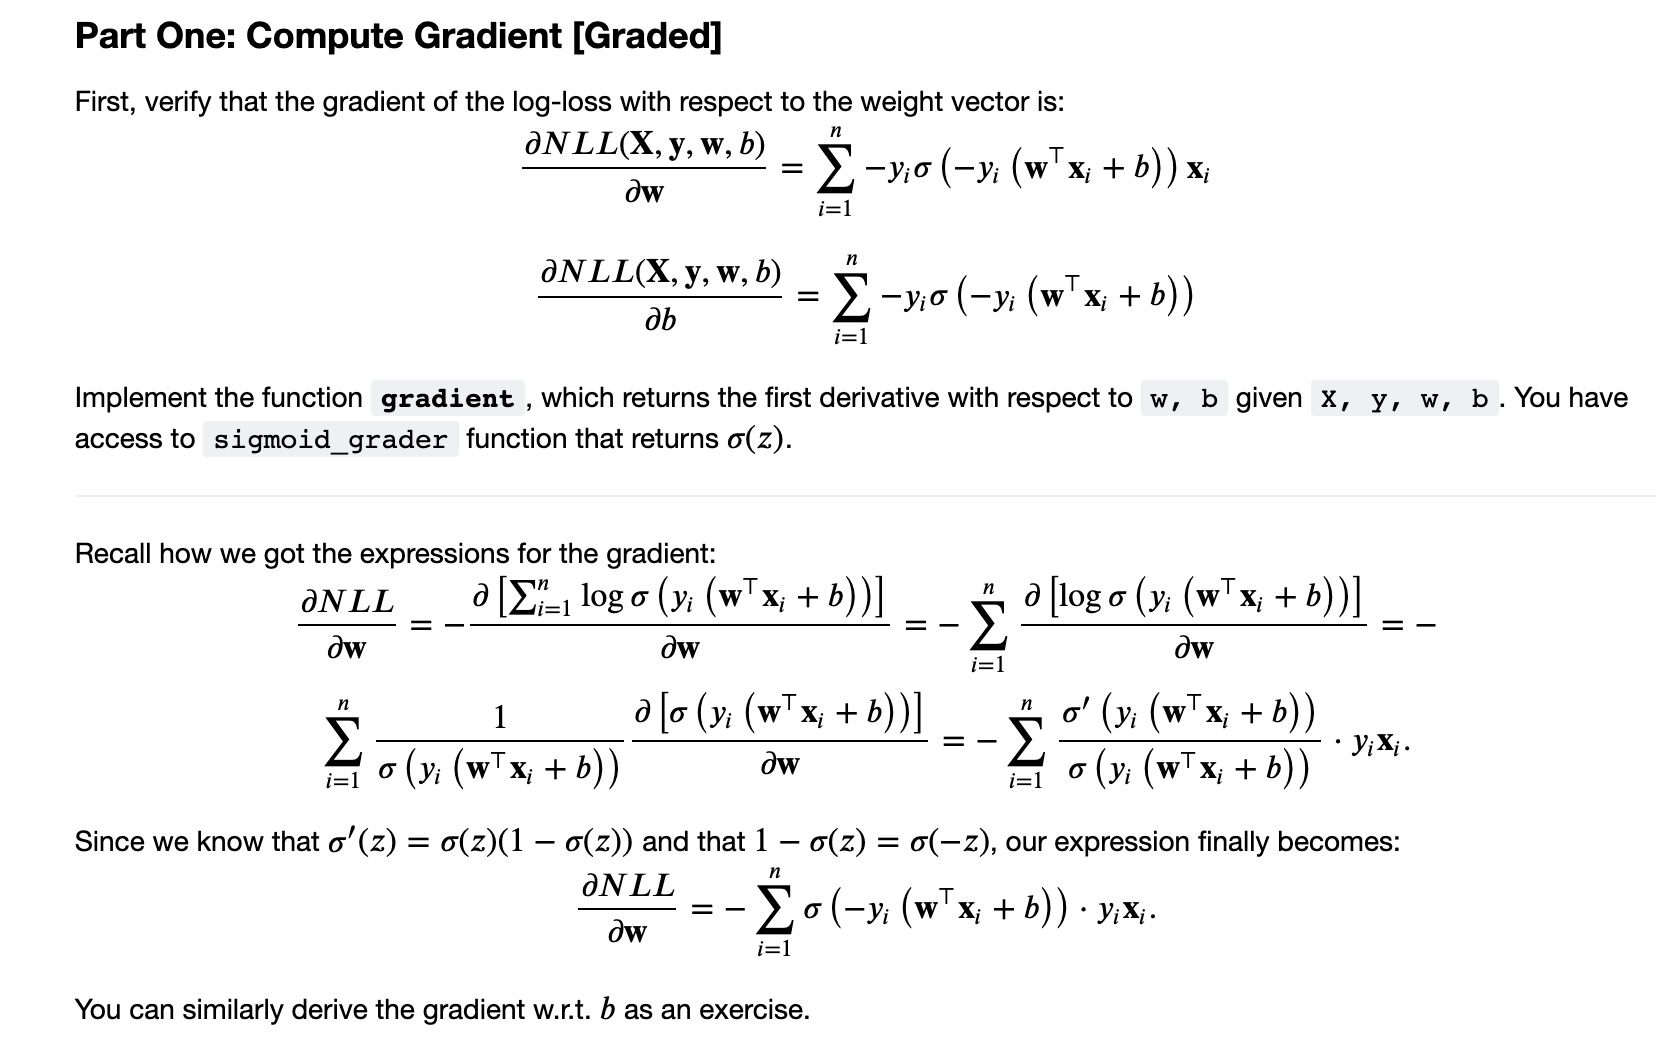

In [ ]:
def gradient(X, y, w, b):
    '''
    Calculates the gradients of NLL w.r.t. w and b and returns (w_grad, bgrad).

    Input:
        X: data matrix of shape nxd
        y: n-dimensional vector of labels (+1 or -1)
        w: d-dimensional weight vector
        b: scalar bias term

    Output:
        wgrad: d-dimensional vector (gradient vector of w)
        bgrad: a scalar (gradient of b)
    '''
    n, d = X.shape
    wgrad = np.zeros(d)
    bgrad = 0.0

    logit = -y*(X@w + b)

    wgrad = (-y*sigmoid(logit)) @ X
    bgrad = np.sum(-y*sigmoid(logit), axis = 0)

    return wgrad, bgrad

    raise NotImplementedError()

In [ ]:
n, d = 5, 3
X = np.random.randint(0, 3, (n,d))    # contains multiple observations as rows
w = np.random.randint(-3, 3, d)       # this will be our trained vector of coefficients
b = 1                                 # this will be our trained offset (or bias) scalar
y = np.array([1, 1, 1, 1, 1])

print(f'X = \n{X}')
print(f'w = {w}, b = {b}')
print(f'y = {y}')

X = 
[[2 2 1]
 [1 1 1]
 [1 2 1]
 [0 1 2]
 [2 1 0]]
w = [ 2  2 -3], b = 1
y = [1 1 1 1 1]


In [ ]:
X@w # X is nxd and w is dx1, output is nx1 array

array([ 5,  1,  3, -4,  6])

In [ ]:
X@w + b #scalar addition

array([ 6,  2,  4, -3,  7])

In [ ]:
logit = -y*(X@w + b) #scalar multiplication
print(logit)

[-6 -2 -4  3 -7]


In [ ]:
sigmoid(logit) #sigmoid element-wise, remains nx1 array

array([2.47262316e-03, 1.19202922e-01, 1.79862100e-02, 9.52574127e-01,
       9.11051194e-04])

In [ ]:
-y*sigmoid(logit) #scalar multiplication

array([-2.47262316e-03, -1.19202922e-01, -1.79862100e-02, -9.52574127e-01,
       -9.11051194e-04])

In [ ]:
(-y*sigmoid(logit)) @ X # gradient weight for each dimension

array([-0.14395648, -1.11360577, -2.04481001])

In [ ]:
np.sum(-y*sigmoid(logit), axis = 0) #scalar

-1.0931469331576777

In [ ]:
gradient(X, y, w, b)

(array([-0.14395648, -1.11360577, -2.04481001]), -1.0931469331576777)

In [ ]:
gradient(X, y, w, b)[0]

array([-0.14395648, -1.11360577, -2.04481001])

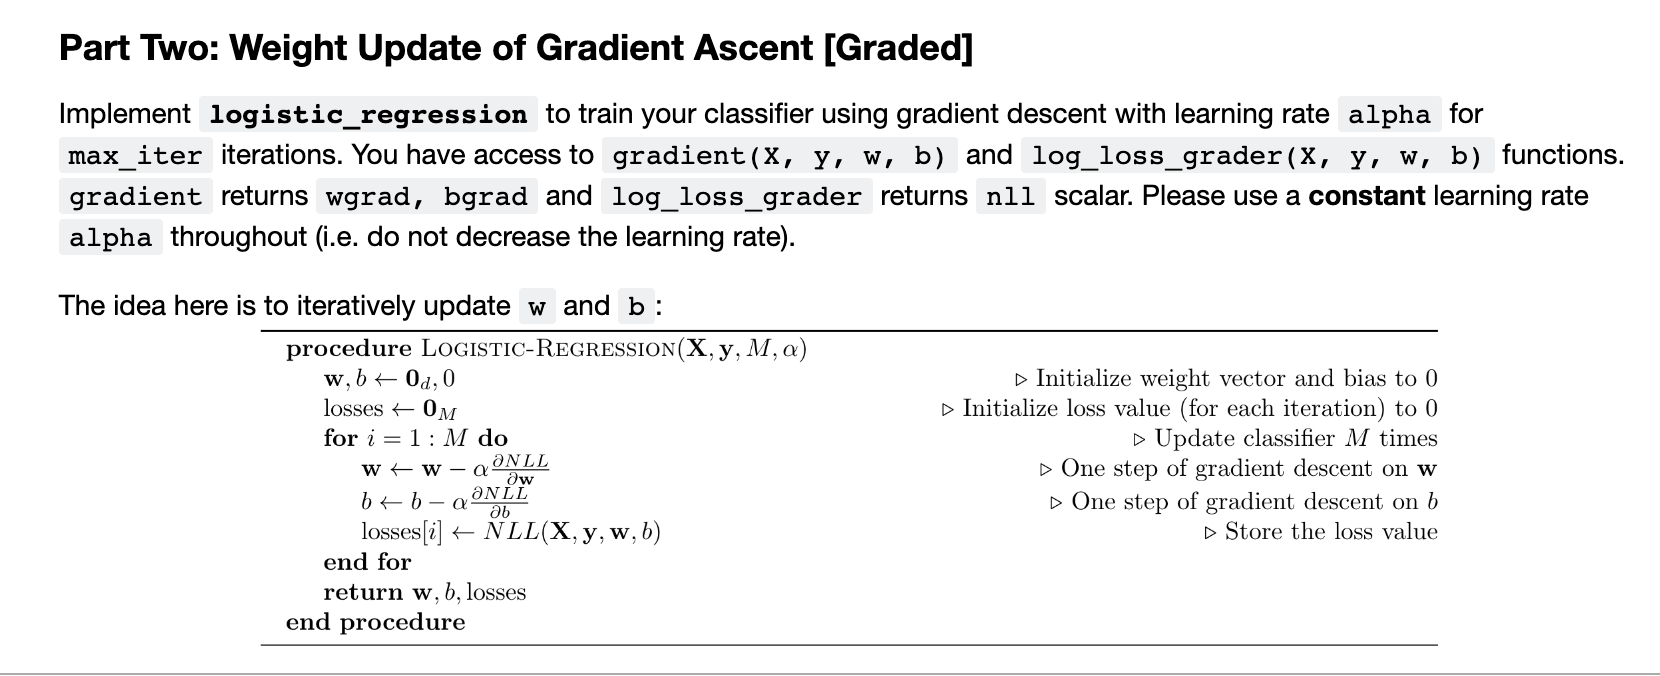

In [ ]:
def logistic_regression(X, y, max_iter, alpha):
    '''
    Trains the logistic regression classifier on data X and labels y using gradient descent for max_iter iterations with learning rate alpha.
    Returns the weight vector, bias term, and losses at each iteration AFTER updating the weight vector and bias.

    Input:
        X: data matrix of shape nxd
        y: n-dimensional vector of data labels (+1 or -1)
        max_iter: number of iterations of gradient descent to perform
        alpha: learning rate for each gradient descent step

    Output:
        w, b, losses
        w: d-dimensional weight vector
        b: scalar bias term
        losses: max_iter-dimensional vector containing negative log likelihood values AFTER a gradient descent in each iteration
    '''
    n, d = X.shape
    w = np.zeros(d)
    b = 0.0
    losses = np.zeros(max_iter)

    for step in range(max_iter):
        wgrad, bgrad = gradient(X,y,w,b)
        w_new = w - alpha*wgrad
        b_new = b - alpha*bgrad
        losses[step] = log_loss(X,y,w_new,b_new)
    return w, b, losses


In [ ]:
 w = w - 0.5*gradient(X,y,w,b)[0]
 print(w)

[ 2.09082231  2.97606027 -1.16053887]


In [ ]:
b = b - 0.5*gradient(X,y,w,b)[1]
print(b)

1.3098388452480816


In [ ]:
logistic_regression(X,y,3, 0.5)

(array([0., 0., 0.]), 0.0, array([0.01040819, 0.01040819, 0.01040819]))

In [ ]:
def test_logistic_regression1():

    XUnit = np.array([[-1,1],[-1,0],[0,-1],[-1,2],[1,-2],[1,-1],[1,0],[0,1],[1,-2],[-1,2]])
    YUnit = np.hstack((np.ones(5), -np.ones(5)))

    w1, b1, _ = logistic_regression(XUnit, YUnit, 30000, 5e-5)
    w2, b2, _ = logistic_regression_grader(XUnit, YUnit, 30000, 5e-5)
    return (np.linalg.norm(w1 - w2) < 1e-5) and (np.linalg.norm(b1 - b2) < 1e-5)

def test_logistic_regression2():
    X = np.vstack((np.random.randn(50, 5), np.random.randn(50, 5) + 2))
    Y = np.hstack((np.ones(50), -np.ones(50)))
    max_iter = 300
    alpha = 1e-5
    w1, b1, _ = logistic_regression(X, Y, max_iter, alpha)
    w2, b2, _ = logistic_regression_grader(X, Y, max_iter, alpha)
    return (np.linalg.norm(w1 - w2) < 1e-5) and (np.linalg.norm(b1 - b2) < 1e-5)

def test_logistic_regression3(): # check if losses match predictions
    X = np.vstack((np.random.randn(50, 5), np.random.randn(50, 5) + 2))
    Y = np.hstack((np.ones(50), -np.ones(50)))
    max_iter = 30
    alpha = 1e-5
    w1, b1, losses1 = logistic_regression(X, Y, max_iter, alpha)
    return np.abs(log_loss_grader(X,Y,w1,b1)-losses1[-1])<1e-09

def test_logistic_regression4(): # check if loss decreases
    X = np.vstack((np.random.randn(50, 5), np.random.randn(50, 5) + 2))
    Y = np.hstack((np.ones(50), -np.ones(50)))
    max_iter = 30
    alpha = 1e-5
    w1, b1, losses = logistic_regression(X, Y, max_iter, alpha)
    return losses[-1]<losses[0]

runtest(test_logistic_regression1, 'test_logistic_regression1')
runtest(test_logistic_regression2, 'test_logistic_regression2')
runtest(test_logistic_regression3, 'test_logistic_regression3')
runtest(test_logistic_regression4, 'test_logistic_regression4')

NameError: ignored

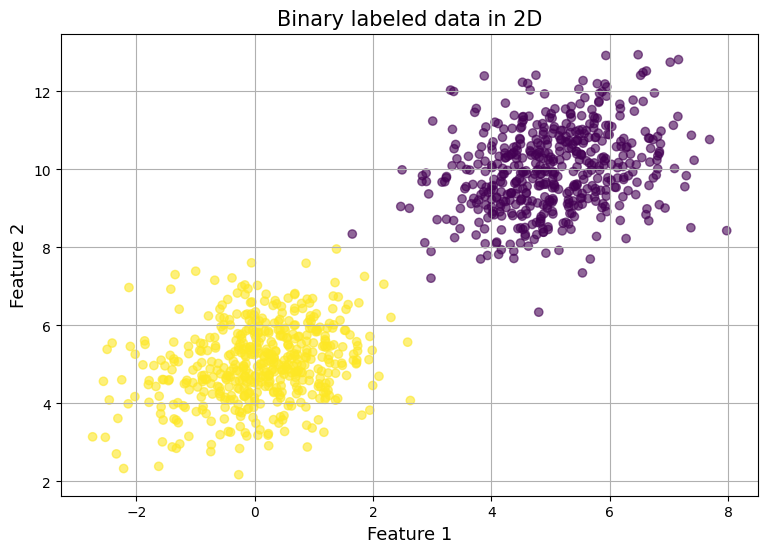

In [ ]:
np.random.seed(12)
n_samples = 500

covariance = [[1, .25],
              [.25, 1]]
class_one = np.random.multivariate_normal(mean=[5, 10], cov=covariance, size=n_samples)
class_one_labels = -np.ones(n_samples)

class_two = np.random.multivariate_normal(mean=[0, 5], cov=covariance, size=n_samples)
class_two_labels = np.ones(n_samples)

features = np.vstack((class_one, class_two))
labels = np.hstack((class_one_labels, class_two_labels))

plt.figure(figsize=(9, 6))
plt.scatter(features[:, 0], features[:, 1],
            c=labels, alpha=.6);

plt.title("Binary labeled data in 2D", size=15);
plt.xlabel("Feature 1", size=13);
plt.ylabel("Feature 2", size=13);
plt.grid();

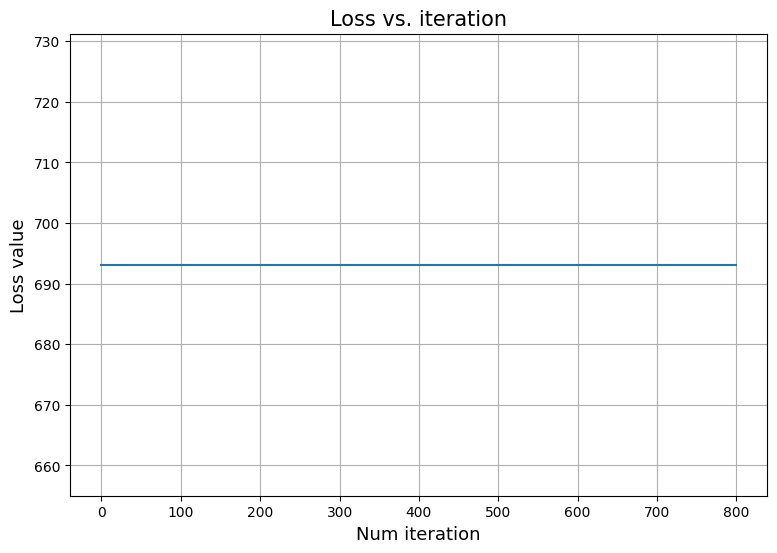

In [ ]:
max_iter = 10000
alpha = 1e-4
final_w, final_b, losses = logistic_regression(features, labels, max_iter, alpha)

plt.figure(figsize=(9, 6))
plt.plot(losses)
plt.title("Loss vs. iteration", size=15)
plt.xlabel("Num iteration", size=13)
plt.ylabel("Loss value", size=13)
plt.grid()

<ipython-input-174-3d8119453969>:10: RuntimeWarning: invalid value encountered in true_divide
  y = -(final_w[0] * x + final_b)/ final_w[1]


(-3.0, 10.0, 0.0, 15.0)

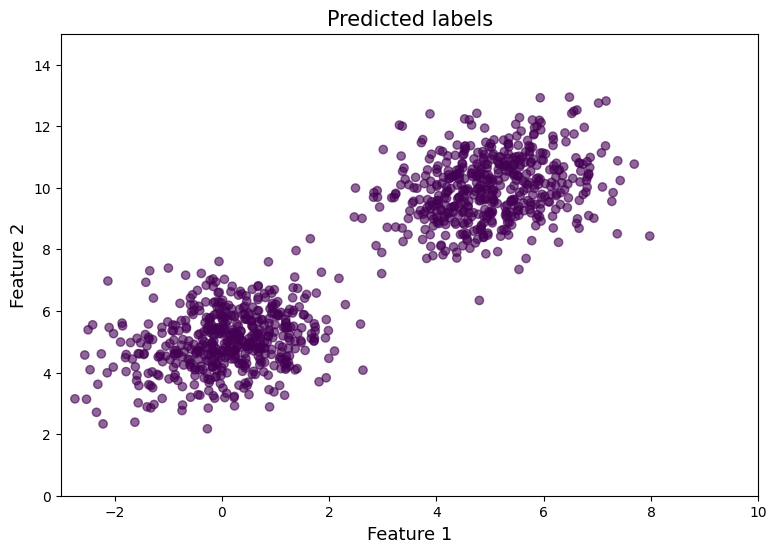

In [ ]:
scores = y_pred(features, final_w, final_b)

pred_labels = (scores > 0.5).astype(int)
pred_labels[pred_labels != 1] = -1

plt.figure(figsize=(9, 6))

# plot the decision boundary
x = np.linspace(np.amin(features[:, 0]), np.amax(features[:, 0]), 10)
y = -(final_w[0] * x + final_b)/ final_w[1]
plt.plot(x, y)

plt.scatter(features[:, 0], features[:, 1],
            c=pred_labels, alpha=.6)
plt.title("Predicted labels", size=15)
plt.xlabel("Feature 1", size=13)
plt.ylabel("Feature 2", size=13)
plt.axis([-3, 10,0,15])

# About this Project
In this Project, you will create a logistic regression classifier that can "filter" spam email messages. Having focused on modeling in the previous projects, you will now dive deep into email data and preprocessing. This project does not have any graded exercises. Instead, you will review how different pieces -- data, modeling, evaluation -- tie up to produce a Machine Learning model.

At the end of the project is an ungraded challenge that we highly recommend! The goal is to improve than the naïve email classification by writing better a feature-extraction function.

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Build an Spam Email Classifier - Project 3 (Spam Email Classifier)
# Load Data
With logistic regression implemented, you can now build an email spam filter using logistic regression. The functions below load in pre-processed email data from cloud storage. With the naïve email extraction function, the emails are represented as binary vectors. We split the email on whitespace to get constituent words, or "tokens", and set the token's feature to 1. This is called a "bag-of-words" representation.

In [ ]:
import pandas as pd
import dask
import dask.bag
from dask.diagnostics import ProgressBar

train_url = 's3://codio/CIS530/CIS533/data_train'
test_url = 's3://codio/CIS530/CIS533/data_test'

In [ ]:
# tokenize the email and hashes the symbols into a vector
def extract_features_naive(email, B):
    '''
    Returns a vector representation for email. The vector is of length B.

    Input:
        email: list of lines in an email
        B: number of dimensions of output vector

    Output:
        B-dimensional vector
    '''
    # initialize all-zeros feature vector
    v = np.zeros(B)
    email = ' '.join(email)

    # breaks for non-ascii characters
    tokens = email.split()
    for token in tokens:
        v[hash(token) % B] = 1
    return v


def load_spam_data(extract_features, B=512, url=train_url):
    '''
    Loads email data from url and extracts features using the extract_features function.

    Input:
        extractfeatures: function to extract features
        B: (optional, default 512) dimensionality of feature space
        url: (optional, default train_url) path to the data

    Output:
        xs, ys, contents
        xs: data matrix of shape nxB where n is the number of emails
        ys: n labels (+1 for spam or -1 for non-spam)
        contents: all unprocessed emails
    '''

    all_emails = pd.read_csv(os.path.join(url, 'index'), header=None).values.flatten()

    xs = np.zeros((len(all_emails), B))
    ys = np.zeros(len(all_emails))

    labels = [k.split()[0] for k in all_emails]
    paths = [os.path.join(url, k.split()[1]) for k in all_emails]

    ProgressBar().register()
    dask.config.set(scheduler='threads', num_workers=50)
    bag = dask.bag.read_text(paths, storage_options={'anon': True})
    contents = dask.bag.compute(*bag.to_delayed())
    for i, email in enumerate(contents):
        # make labels +1 for "spam" and -1 for "non-spam" (convert from 0, 1 to -1, +1)
        ys[i] = (labels[i] == 'spam') * 2 - 1
        xs[i, :] = extract_features(email, B)
    print('Loaded %d input emails.' % len(ys))
    return xs, ys, contents

Xspam, Yspam, contents = load_spam_data(extract_features_naive)

ImportError: ignored

In [ ]:
print(Xspam.shape)
print(Yspam[0], 'spam' if Yspam[0] > 0 else 'non-spam')
print(np.array(contents[0]))
print(Xspam)

# Split The Dataset
Now that you have loaded the dataset, it's time to split it into training and testing. Run the code below to split of 20% of the data into a validation set, leaving 80% as your training set. Unlike a testing that is hidden and is used to evaluate your final algorithm once at the end, the validation set is available and can be used to evaluate and tune parameters like the learning rate for your model.

You will train the model on the training set and evaluate on the validation set. You can repeatedly do so and improve the model's performance. A validation set is thus like a testing test but is split off from the full training set. That is why you have access to the validation set but not to the real testing set.

In [ ]:
# Split data into training (xTr and yTr) and validation (xTv and yTv)
n, d = Xspam.shape

# Set the seed for consistency across runs, and shuffle the dataset randomly
np.random.seed(1)
shuffle_idxs = np.random.permutation(n)
Xspam = Xspam[shuffle_idxs]
Yspam = Yspam[shuffle_idxs]

# Allocate 80% of the data for training and 20% for testing
cutoff = int(np.ceil(0.8 * n))
# indices of training samples
xTr = Xspam[:cutoff, :]
yTr = Yspam[:cutoff]
# indices of Validation samples
xTv = Xspam[cutoff:, :]
yTv = Yspam[cutoff:]

NameError: ignored

# Training and Evaluating
Running the following cell will produce a logistic regression model that can classify unseen emails (validation set) at roughly 90% validation accuracy.

In [ ]:
max_iter = 5000
alpha = 1e-5
final_w_spam, final_b_spam, losses = logistic_regression_grader(xTr, yTr, max_iter, alpha)

plt.figure(figsize=(9, 6))
plt.plot(losses)
plt.title("Loss vs. iteration", size=15)
plt.xlabel("Num iteration", size=13)
plt.ylabel("Loss value", size=13)

# evaluate training accuracy
scoresTr = y_pred_grader(xTr, final_w_spam, final_b_spam)
pred_labels = (scoresTr > 0.5).astype(int)
pred_labels[pred_labels != 1] = -1
trainingacc = np.mean(pred_labels == yTr)

# evaluate validation accuracy
scoresTv = y_pred_grader(xTv, final_w_spam, final_b_spam)
pred_labels = (scoresTv > 0.5).astype(int)
pred_labels[pred_labels != 1] = -1
validationacc = np.mean(pred_labels == yTv)
print("Training accuracy %2.2f%%\nValidation accuracy %2.2f%%\n" % (trainingacc*100, validationacc*100))

## Scikit-learn example
Scikit-learn actually provides two implementations of Logistic Regression: as sklearn.linear_model.LogisticRegression and as sklearn.linear_model.SGDClassifier(loss='log'). The former uses second-order gradient methods (using the second derivative of  𝑁𝐿𝐿
 ) to converge faster. We will demonstrate using the latter implementation so that you get similar results to the classifier you built.

In [ ]:
from sklearn.linear_model import SGDClassifier

regularizer_multiplier = 0.
clf = SGDClassifier(
    loss='log', # Logistic Regression
    tol=None, # Run to max_iter
    alpha=regularizer_multiplier, # Don't use L2 or L1 regularizer
    learning_rate='constant', eta0=alpha, # Constant learning rate
    max_iter=max_iter
)
clf.fit(xTr, yTr)
final_w_sklearn, final_b_sklearn = clf.coef_.flatten(), clf.intercept_.flatten()

# evaluate training accuracy
scoresTr = y_pred_grader(xTr, final_w_sklearn, final_b_sklearn)
pred_labels = (scoresTr > 0.5).astype(int)
pred_labels[pred_labels != 1] = -1
trainingacc = np.mean(pred_labels == yTr)

# evaluate testing accuracy
scoresTv = y_pred_grader(xTv, final_w_sklearn, final_b_sklearn)
pred_labels = (scoresTv > 0.5).astype(int)
pred_labels[pred_labels != 1] = -1
validationacc = np.mean(pred_labels == yTv)
print("Training accuracy %2.2f%%\nValidation accuracy %2.2f%%\n" % (trainingacc*100, validationacc*100))

NameError: ignored

# Challenge: Improve Your Spam Classifier [Ungraded]
You can improve your classifier in two ways:

**Feature Extraction**: Modify the function extract_features_challenge(). This function takes in a email (list of lines in an email) and a feature dimension B, and should output a feature vector of dimension B. The autograder will pass in both arguments. We provide naive feature extraction from above as an example.

**Model Training**: Modify the function train_spam_filter_challenge(). This function takes in training data xTr, yTr and should output a weight vector w and bias term b for classification. The predictions will be calculated exactly the same way as we have demonstrated in the previous cell. We provide an initial implementation using gradient descent and logistic regression.

Your model will be trained on the same training set above (loaded by load_spam_data()), but we will test its accuracy on a testing dataset of emails (hidden from you).

In [ ]:
feature_dimension = 512
def extract_features_challenge(email, B=feature_dimension):
    '''
    Returns a vector representation for email. The vector is of length B.

    Input:
        email: list of lines in an email
        B: number of dimensions of output vector

    Output:
        B-dimensional vector
    '''
    # initialize all-zeros feature vector
    v = np.zeros(B)
    email = ' '.join(email)
    # breaks for non-ascii characters
    tokens = email.split()
    for token in tokens:
        v[hash(token) % B] = 1

    # YOUR CODE HERE

    return v

In [ ]:
def train_spam_filter_challenge(xTr, yTr):
    '''
    Train a model on training data xTr and labels yTr, and return weight vector and bias term.

    Input:
        xTr: data matrix of shape nxd
        yTr: n-dimensional vector data labels (+1 or -1)

    Output:
        w, b
        w: d-dimension weight vector
        b: scalar bias term
    '''
    n, d = xTr.shape

    max_iter = 100
    alpha = 1e-5
    w, b, losses = logistic_regression_grader(xTr, yTr, max_iter, alpha)


    # YOUR CODE HERE

    return w, b

In [ ]:
def challenge_selftest():
    xTr, yTr, cTr = load_spam_data(extract_features_challenge, feature_dimension, train_url)
    w, b = train_spam_filter_challenge(xTr, yTr)
    xTe, yTe, cTe = load_spam_data(extract_features_challenge, feature_dimension, test_url)
    scoresTe = sigmoid_grader(xTe @ w + b)

    preds = (scoresTe > 0.5).astype(int)
    preds[preds != 1] = -1

    pos_ind = (yTe == 1)
    neg_ind = (yTe == -1)

    pos_acc = np.mean(yTe[pos_ind] == preds[pos_ind])
    neg_acc = np.mean(yTe[neg_ind] == preds[neg_ind])

    test_accuracy = 0.5*pos_acc + 0.5*neg_acc

    scoresTr =  sigmoid_grader(xTr @ w + b)
    preds_Tr = (scoresTr > 0.5).astype(int)
    preds_Tr[preds_Tr != 1] = -1

    training_accuracy = np.mean(preds_Tr == yTr)
    return training_accuracy, test_accuracy

training_acc, test_acc = challenge_selftest()
print("Your features and model achieved training accuracy: {:.2f}% and test accuracy: {:.2f}%".format(training_acc*100, test_acc*100))